Prediction using Supervised ML (Level - Beginner)

● Predict the percentage of an student based on the no. of study hours.

● This is a simple linear regression task as it involves just 2 variables.

● You can use R, Python, SAS Enterprise Miner or any other tool

● Data can be found at http://bit.ly/w-data

● What will be predicted score if a student studies for 9.25 hrs/ day?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Reading data from URL

In [2]:
data=pd.read_csv("http://bit.ly/w-data")

In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Data analysis

In [4]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


No null values in the given data

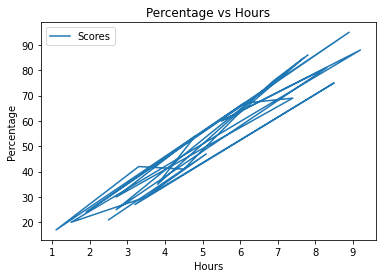

In [6]:
data.plot(x='Hours',y='Scores')
plt.xlabel('Hours')
plt.ylabel('Percentage')
plt.title('Percentage vs Hours')
plt.show()

Preparing data for training and testing of data

In [7]:
x=data.iloc[:, :-1].values
y=data.iloc[:,1].values

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

Checking train data with linear regression model

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
model=LinearRegression()
model.fit(x_train,y_train)
#parameters of regresssion line
i=model.intercept_
c=model.coef_
print(i)
print(c)

2.018160041434662
[9.91065648]


Plotting Regression line

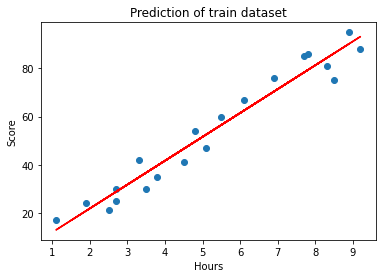

In [11]:
rline=c*x+i
plt.scatter(x_train,y_train)
plt.plot(x,rline,'r')
plt.title("Prediction of train dataset")
plt.xlabel("Hours")
plt.ylabel("Score")
plt.show()

Making Predictions

In [13]:
ypred=model.predict(x_test)

In [14]:
dataframe=pd.DataFrame({'Predicted':ypred,'Actual':y_test})
dataframe

,Predicted,Actual
0,16.884145,20
1,33.732261,27
2,75.357018,69
3,26.794801,30
4,60.491033,62


What will be predicted score if a student studies for 9.25 hrs/ day?

In [15]:
score=model.predict([[9.25]])
print("Predicted score if as student studies for 9.25hrs/day is : ",score)

Predicted score if as student studies for 9.25hrs/day is :  [93.69173249]


Model Evaluation

In [16]:
from sklearn import metrics

In [17]:
ae=metrics.mean_absolute_error(y_test,ypred)
print("Mean Absolute Error:",ae)

Mean Absolute Error: 4.183859899002982
